In [1]:
from sklearn.linear_model import LinearRegression

screen_y = [x for x in range(10, 100, 5) if x <= 95]
screen_y = [[x / 100] for x in screen_y]
angles_y = [64, 66, 71, 73, 77, 79, 83, 86, 89, 92, 95, 100, 104, 107, 110, 115, 119, 122]

screen_x = [x for x in range(10, 100, 10) if x <= 90]
screen_x = [[x / 100] for x in screen_x]
angles_x = [52, 58, 67, 75, 84, 96, 106, 115, 122]

l_y = LinearRegression().fit(screen_y, angles_y)
y_coef, y_intercept = l_y.coef_, l_y.intercept_
display(f"y: {y_coef}, {y_intercept}")

l_x = LinearRegression().fit(screen_x, angles_x)
x_coef, x_intercept = l_x.coef_, l_x.intercept_
display(f"x: {x_coef}, {x_intercept}")

'y: [68.52425181], 55.80254557963534'

'x: [91.66666667], 40.277777777777786'

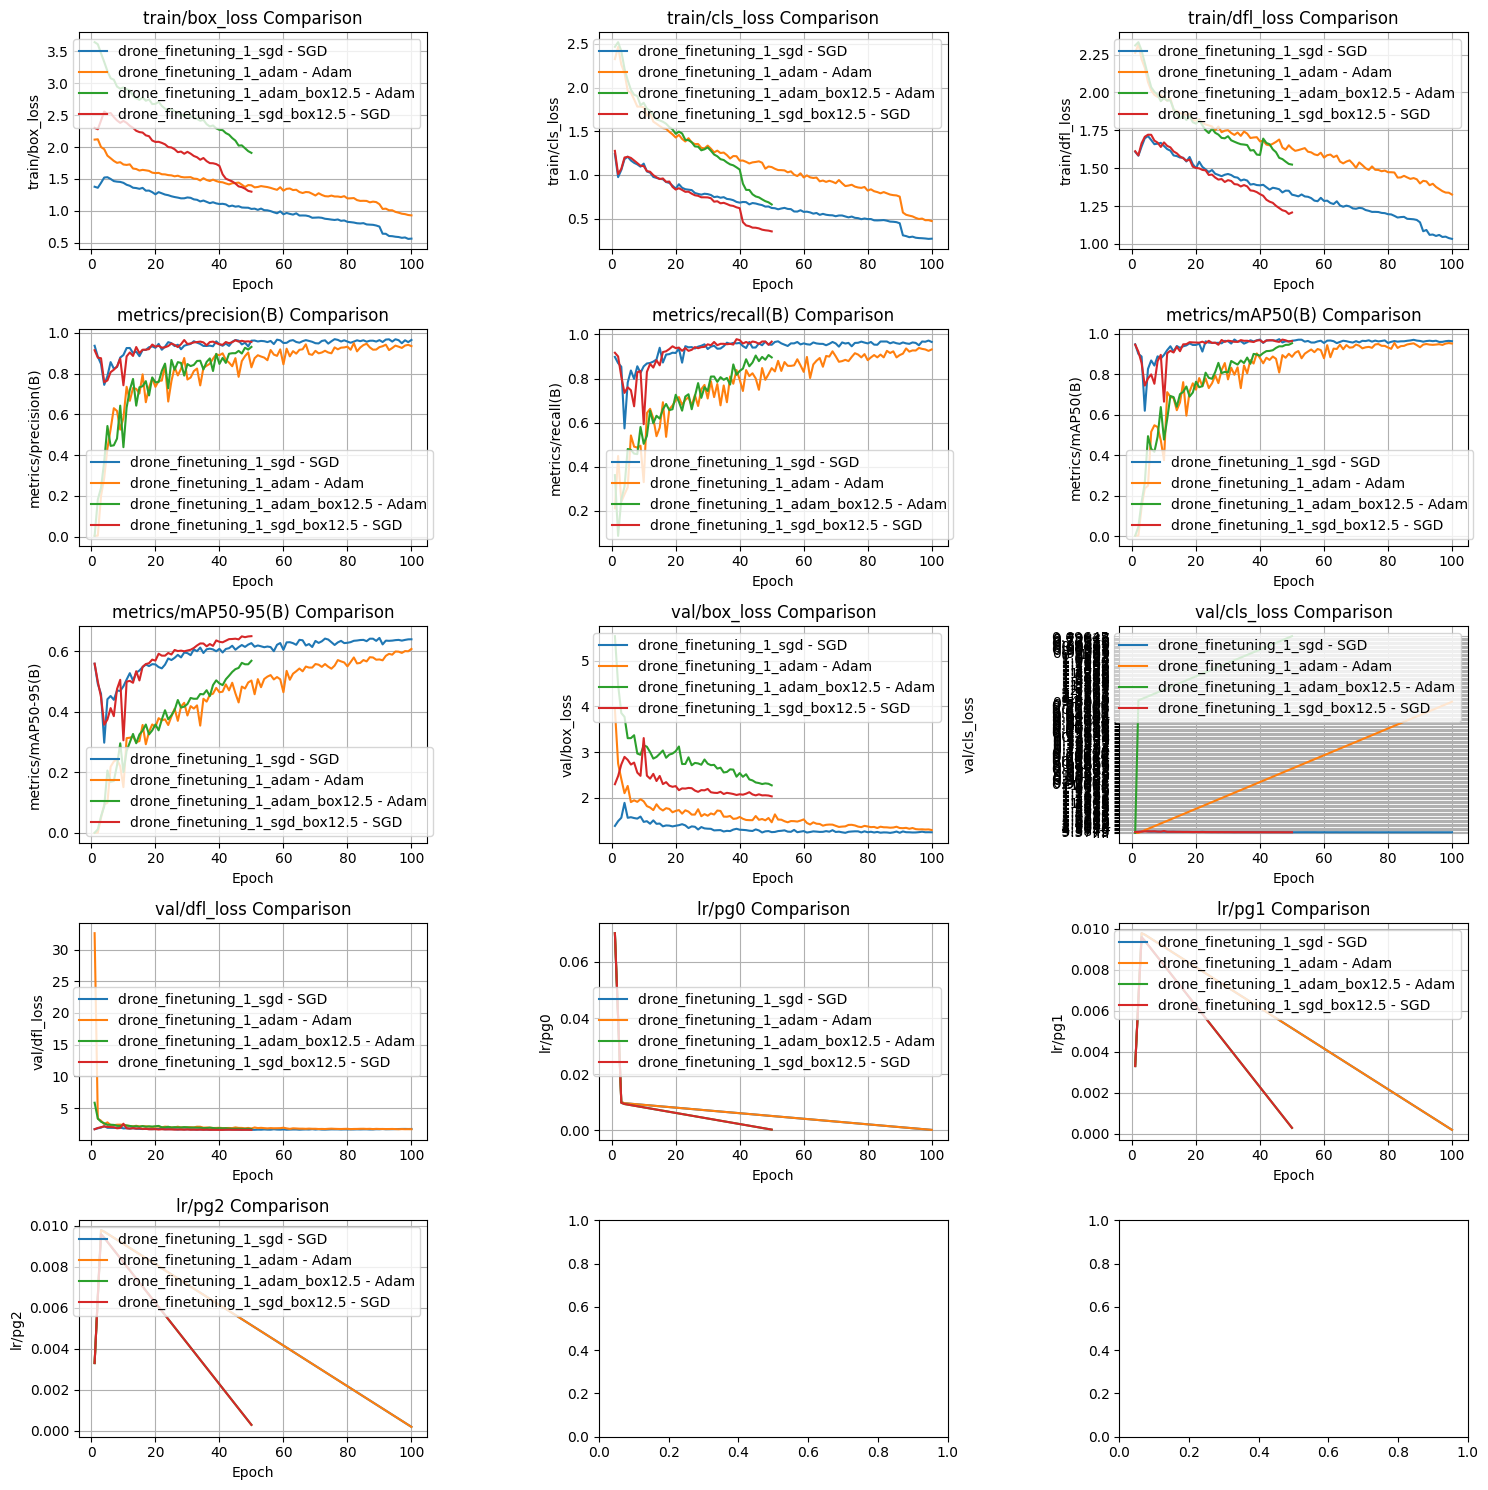

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
import os

models = [
    "drone_finetuning_1_sgd",
    "drone_finetuning_1_adam",
    "drone_finetuning_1_adam_box12.5",
    "drone_finetuning_1_sgd_box12.5"
]

n = len(models)

infos = [None] * n
optimizers = [None] * n

for i, model in enumerate(models):

    with open(f"runs/detect/{model}/args.yaml", "r") as file:
        config = yaml.safe_load(file)

    optimizer = config['optimizer']
    optimizers[i] = optimizer

    df = pd.read_csv(f"runs/detect/{model}/results.csv")
    df.columns = [col.strip() for col in df.columns]
    infos[i] = df

cols = list(infos[0].columns)

nb_of_rows = 5
nb_of_cols = 3

fig, axes = plt.subplots(nb_of_rows, nb_of_cols, figsize=(15, 15))

c = 1

for i in range(nb_of_rows):
    for j in range(nb_of_cols):

        if c >= len(cols):
            break
        if cols[c].strip() == 'epoch':
            c += 1
            continue
        
        for k, m in enumerate(infos):
            axes[i, j].plot(m['epoch'], m[cols[c]], label=f"{models[k]} - {optimizers[k]}")

        axes[i, j].set_xlabel('Epoch')
        axes[i, j].set_ylabel(cols[c].strip())
        axes[i, j].set_title(f'{cols[c].strip()} Comparison')
        axes[i, j].legend()
        axes[i, j].grid(True)
        
        c += 1

plt.tight_layout()
plt.show()

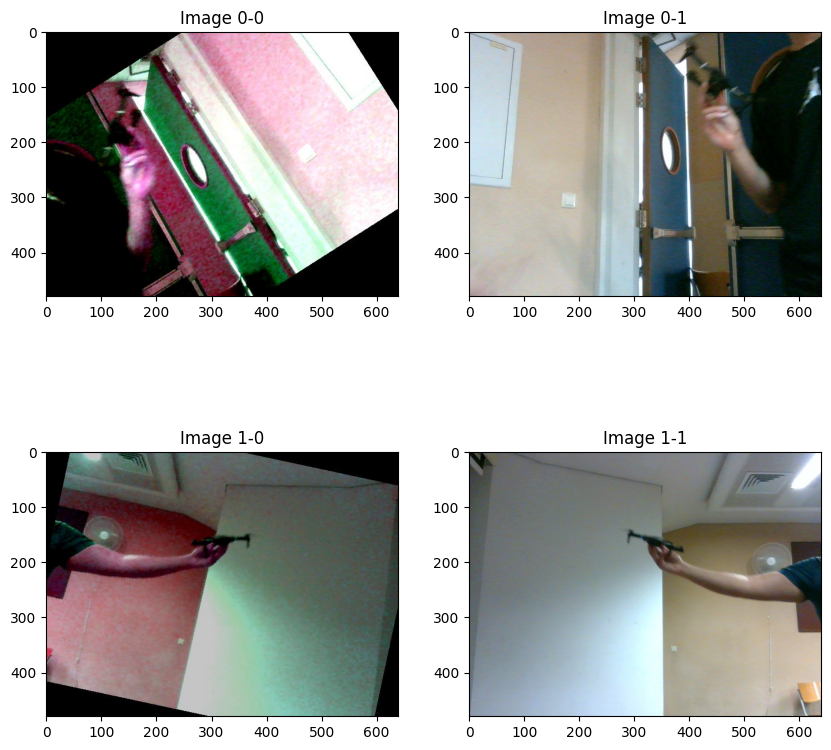

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import randint 

images = os.listdir("c1")
n = len(images)

k = randint(0, n - 2)
l = k + 1

m1 = mpimg.imread(f'./c1_aug/aug_{images[k]}')
m2 = mpimg.imread(f'./c1/{images[k]}')
m3 = mpimg.imread(f'./c1_aug/aug_{images[l]}')
m4 = mpimg.imread(f'./c1/{images[l]}')

images = [m1, m2, m3, m4]
counter = 0

fix, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    for j in range(2):
        ax[i, j].imshow(images[counter])
        ax[i, j].set_title(f'Image {i}-{j}')
        
        counter += 1